#                                             Final Project
# Predicting if a Neutron Star is a Pulsar or not using Binary Classification

## Rishikesh Kulkarni 19173

## Physics Department

## -------------------------------------------------------------------------------------------------------------

## Preparation of Problem

### Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading the Data

In [2]:
data = pd.read_csv('pulsar_stars.csv')
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Summarisation of Data

### Statistical information of the data

In [4]:
data['target_class'].value_counts() 

0    16259
1     1639
Name: target_class, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [7]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [8]:
data.corr(method='pearson')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


## Data Visualization

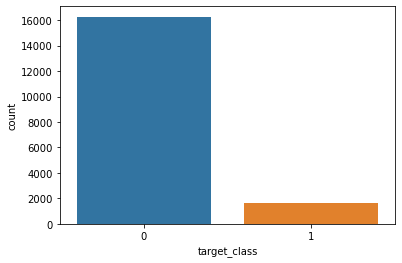

In [9]:
sns.countplot(data['target_class'])

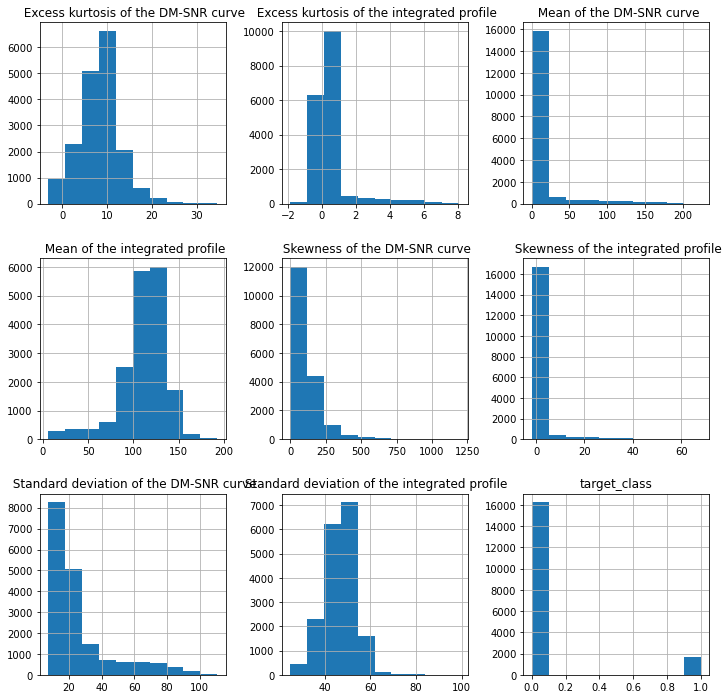

In [10]:
from matplotlib import pyplot
data.hist(figsize=(12,12))
pyplot.show()

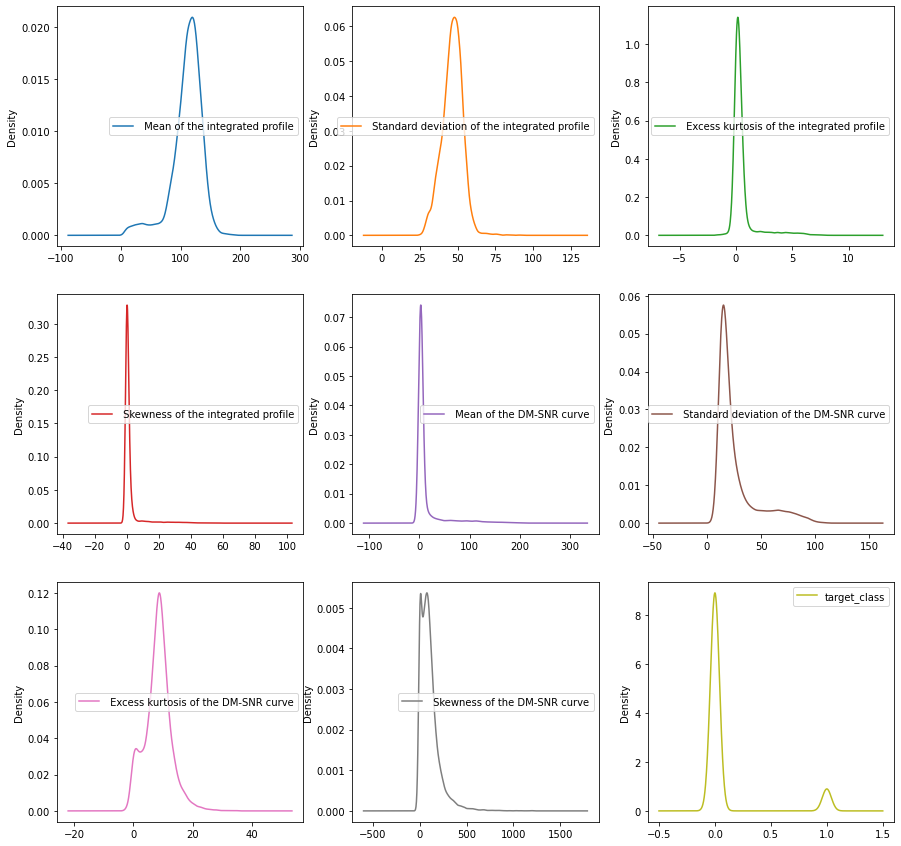

In [11]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))
pyplot.show()

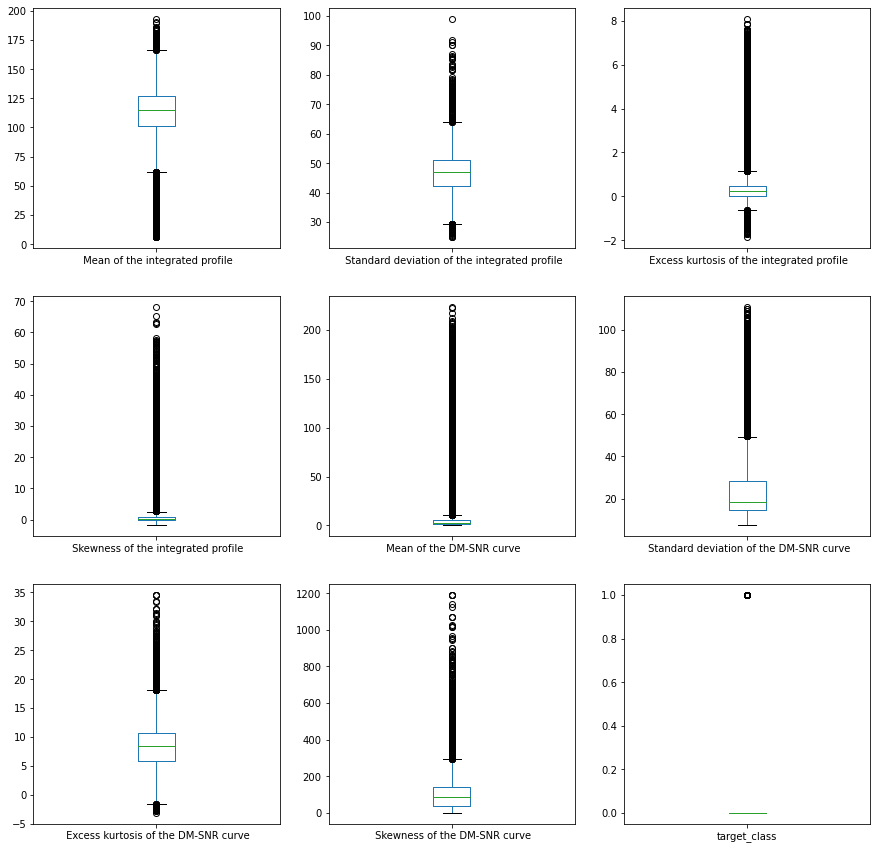

In [12]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

### Visualization of Correlation of data 

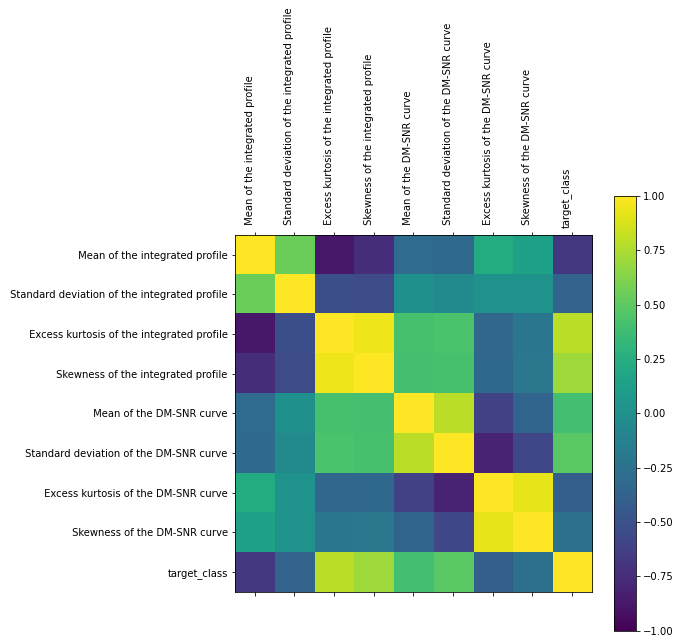

In [13]:
names = data.columns
correlations = data.corr()
fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90, ha = 'right')
ax.set_yticklabels(names)
pyplot.show()


## Pre-processing of the data

Our original data contains negative values so we rescale our data into positive values 

### Rescaling the Data 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
array = data.values
array
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
X = rescaledX[:]

In [19]:
X[0,:]

array([0.721, 0.418, 0.165, 0.016, 0.013, 0.114, 0.295, 0.064])

### Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
select_feature = SelectKBest(score_func=chi2, k = 4)

In [22]:
fit = select_feature.fit(X,Y)
features = fit.transform(X)

In [23]:
features[0:5]

array([[0.165, 0.016, 0.013, 0.114],
       [0.235, 0.018, 0.007, 0.073],
       [0.221, 0.041, 0.013, 0.139],
       [0.182, 0.017, 0.015, 0.132],
       [0.249, 0.042, 0.004, 0.04 ]])

So, the top four features are "Excess kurtosis of the integrated profile", "Skewness of the integrated profile",
"Mean of the DM-SNR curve" and "Standard deviation of the DM-SNR curve"

In [24]:
X_feat = pd.DataFrame(data = features, columns = ["Excess kurtosis of the integrated profile",
                                                  "Skewness of the integrated profile",
                                                  "Mean of the DM-SNR curve", "Standard deviation of the DM-SNR curve"])
X_feat.head()

,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve
0,0.165043,0.015627,0.013382,0.113681
1,0.235415,0.018268,0.006560,0.072524
2,0.221138,0.040677,0.013030,0.139188
3,0.181750,0.016534,0.015368,0.131583
4,0.249044,0.041712,0.004327,0.039684


## Evaluation of Algorithms

### Splitting the Validation Set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

## Binary Classification Models

In [26]:
models = []

### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
models.append(("LR", LogisticRegression()))

### K-Nearest Neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
models.append(("KNN", KNeighborsClassifier()))

### Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
models.append(("DT", DecisionTreeClassifier()))

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
models.append(("RFC", RandomForestClassifier()))

### Support Vector Machines

In [31]:
from sklearn.svm import SVC
models.append(("SVC", SVC()))

### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
models.append(("NB",GaussianNB()))

### k-fold Cross-Validation

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits = 10, random_state = None, shuffle = True)
    cv_result = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)

In [35]:
for i in range(len(names)):
    print(names[i], results[i].mean())

LR 0.9728821298935919
KNN 0.9772778318443149
DT 0.9675193890493624
RFC 0.979289421441198
SVC 0.9775760608908808
NB 0.9433813126072931


### Visualization of Results

[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RFC'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'NB')]

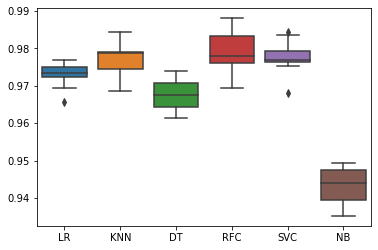

In [36]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)

Accuracy is maxmium for K Neighbors classifier model and Random Forest Classifier

## Prediction of Results

### Accuracy Score for K Neighbors Classifier and Random Forest Classifier

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,Y_train)
predictions = KNC.predict(X_test)

In [40]:
print(accuracy_score(Y_test,predictions))

0.9825698324022346


In [41]:
rvm = RandomForestClassifier()
rvm.fit(X_train,Y_train)
predictions = rvm.predict(X_test)

In [42]:
print(accuracy_score(Y_test,predictions))

0.9832402234636871


Thus we have successfully made the predictions with a high accuracy score  

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4115
         1.0       0.94      0.84      0.89       360

    accuracy                           0.98      4475
   macro avg       0.97      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test,predictions)

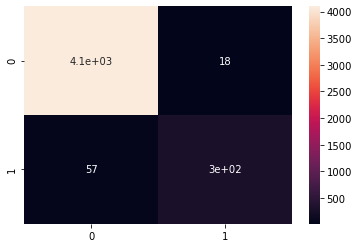

In [45]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)